In [397]:
import numpy as np
from sympy import *
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (19,6)
from utils import *
from filters import *

def ideal_lp(wc):
    def response(n):
        if n==0 : return wc/np.pi
        else : return np.sin(wc*n)/(np.pi*n)
    return np.vectorize(response)

def ideal_bp(wc1,wc2):
    return lambda n : ideal_lp(wc2)(n) - ideal_lp(wc1)(n)

def ideal_sb(wc1,wc2):
    return lambda n : ideal_all_pass()(n) - ideal_lp(wc2)(n) + ideal_lp(wc1)(n)

def ideal_all_pass():
    def response(n):
        if n==0 : return 1
        else : return 0
    return np.vectorize(response)

non_causal = 0
def myfourier(x):
    def trans_form(w):
        N = (len(x)-1)//2
        fre = np.exp(-1j*w*(np.linspace(0,2*N,2*N+1)-N*non_causal))
        return np.dot(x,fre)
    return np.vectorize(trans_form)

## Bandpass

In [398]:
delta1 = 0.15
delta2 = 0.15
fp1,fp2,fs1,fs2,f_samp = 118000,193000,113000,198000,600000

def normalize(f_samp,L_freq):
    return (np.array(L_freq)/f_samp)*2*np.pi

[wp1,wp2,ws1,ws2] = normalize(f_samp,[fp1,fp2,fs1,fs2])

print([wp1,wp2,ws1,ws2])
wc1 = (wp1+ws1)/2
wc2 = (wp2+ws2)/2

resp = ideal_bp(wc1,wc2)
print(wc1,wc2)

[1.2356931104119853, 2.0210912738094335, 1.1833332328521553, 2.0734511513692637]
1.2095131716320702 2.0472712125893486


In [399]:
# kaiser parameters

A = -20*np.log10(delta1)

if A < 21:
    alpha = 0
elif A <51:
    alpha = 0.5842*((A-21)**0.4) + 0.07886*(A-21)
else : alpha = 0.1102*(A-8.7)

N_lb = int(np.ceil(0.5*(A-8)/(2.285*(wp1-ws1)))) # lower bound on N
print(A,alpha,N_lb)

16.478174818886377 0 36


In [400]:
# since alpha is zero, this is basically a rectangular window

In [401]:
N = N_lb+10
n = np.linspace(-N,N,2*N+1)

In [402]:
response = resp(n)
print(response)

[ 4.96090674e-03 -4.68375339e-17  4.83239944e-03 -6.78883949e-03
 -1.08134116e-02  1.08619978e-02  9.22277595e-03 -7.48804393e-03
 -2.01773836e-03 -3.03042283e-03 -5.00750444e-03  1.42177528e-02
  7.03597669e-03 -1.73581257e-02 -3.97581727e-03  8.16105963e-03
  2.25514052e-17  8.88469984e-03  7.07550024e-04 -2.24217292e-02
  1.78344109e-03  2.18644880e-02 -2.92155353e-03 -5.58143184e-03
 -1.79914757e-03 -1.66685308e-02  1.12122832e-02  2.96111724e-02
 -1.71224955e-02 -2.30987873e-02  9.78455204e-03  1.07552856e-16
  1.28015138e-02  2.47730394e-02 -3.88763345e-02 -3.40747879e-02
  4.62383318e-02  2.05998344e-02 -1.48196287e-02  7.41857325e-03
 -5.86789251e-02 -3.13171733e-02  1.54101063e-01  3.46988103e-02
 -2.34982670e-01 -1.49054328e-02  2.66666667e-01 -1.49054328e-02
 -2.34982670e-01  3.46988103e-02  1.54101063e-01 -3.13171733e-02
 -5.86789251e-02  7.41857325e-03 -1.48196287e-02  2.05998344e-02
  4.62383318e-02 -3.40747879e-02 -3.88763345e-02  2.47730394e-02
  1.28015138e-02  1.07552

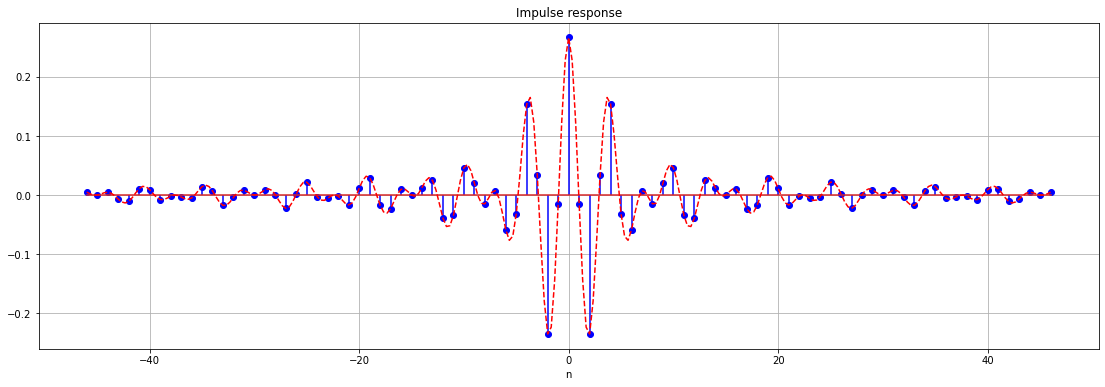

0.2666666666666668


In [403]:
plt.stem(n,response,'bo')
x = np.linspace(-N,N,6*N+1)
y = resp(x)
plt.plot(x,y,'r--')
plt.title('Impulse response')
plt.xlabel('n')
plt.grid(True)
plt.savefig('IR_bp.pdf')
plt.show()
print(response[N])


In [404]:
freq_resp_fn = myfourier(response)
ang_freq = np.linspace(0,np.pi,1401)
freq_resp = freq_resp_fn(ang_freq)

In [405]:
mag_resp = np.absolute(freq_resp)
phase = np.angle(freq_resp)


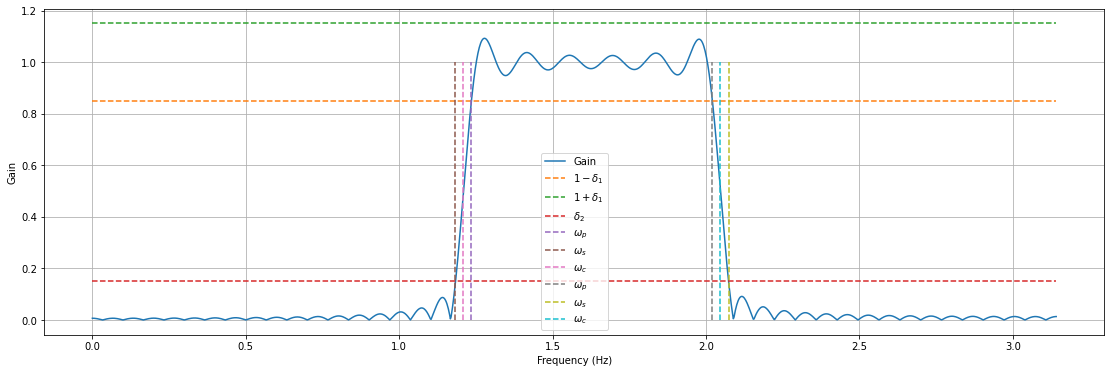

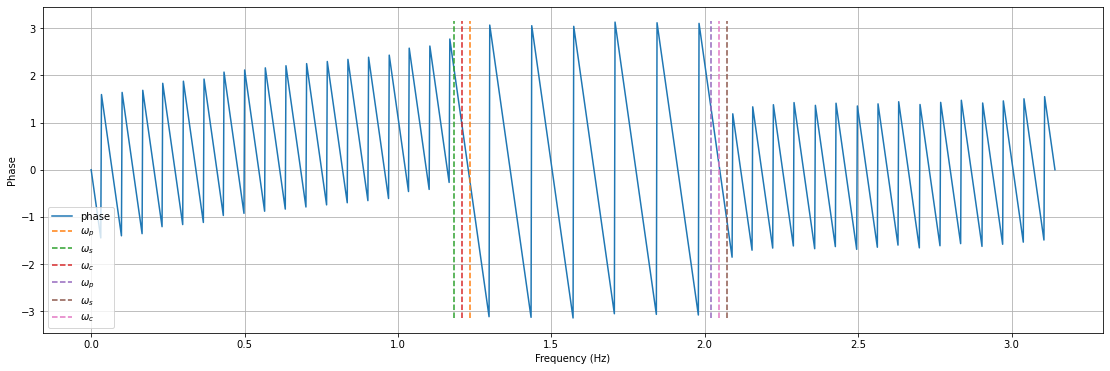

In [406]:
plt.plot(ang_freq,mag_resp,label="Gain")
plt.plot([ang_freq[0],ang_freq[-1]], [1-delta1,1-delta1],'--', label='$1-\delta_1$')
plt.plot([ang_freq[0],ang_freq[-1]], [1+delta1,1+delta1],'--', label='$1+\delta_1$')
plt.plot([ang_freq[0],ang_freq[-1]], [delta2,delta2],'--', label='$\delta_2$')
plt.plot([wp1,wp1], [0,1],'--', label='$\omega_p$')
plt.plot([ws1,ws1], [0,1],'--', label='$\omega_s$')
plt.plot([wc1,wc1], [0,1],'--', label='$\omega_c$')
plt.plot([wp2,wp2], [0,1],'--', label='$\omega_p$')
plt.plot([ws2,ws2], [0,1],'--', label='$\omega_s$')
plt.plot([wc2,wc2], [0,1],'--', label='$\omega_c$')

plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain')
plt.grid(True)
plt.legend(loc='best')
plt.savefig('bp_mag.pdf')
plt.show()

plt.plot(ang_freq,phase,label="phase")
plt.plot([wp1,wp1], [-np.pi,np.pi],'--', label='$\omega_p$')
plt.plot([ws1,ws1], [-np.pi,np.pi],'--', label='$\omega_s$')
plt.plot([wc1,wc1], [-np.pi,np.pi],'--', label='$\omega_c$')
plt.plot([wp2,wp2], [-np.pi,np.pi],'--', label='$\omega_p$')
plt.plot([ws2,ws2], [-np.pi,np.pi],'--', label='$\omega_s$')
plt.plot([wc2,wc2], [-np.pi,np.pi],'--', label='$\omega_c$')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase')
plt.grid(True)
plt.legend(loc='best')
plt.savefig('bp_phase.pdf')
plt.show()

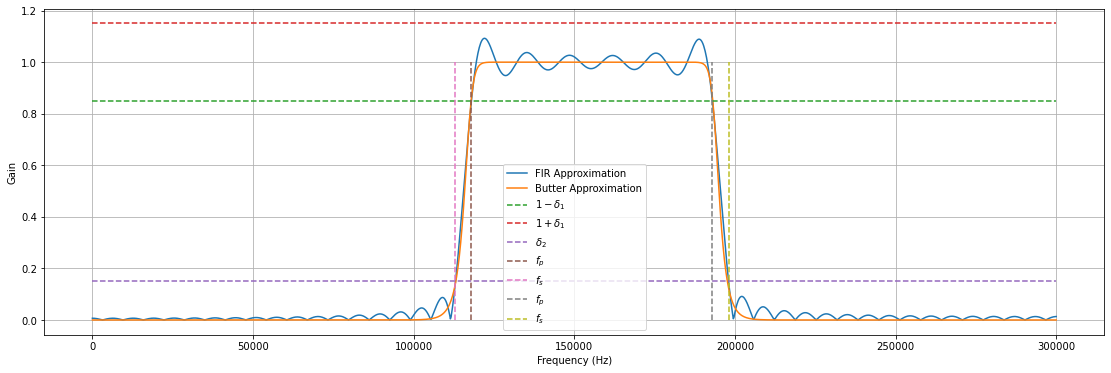

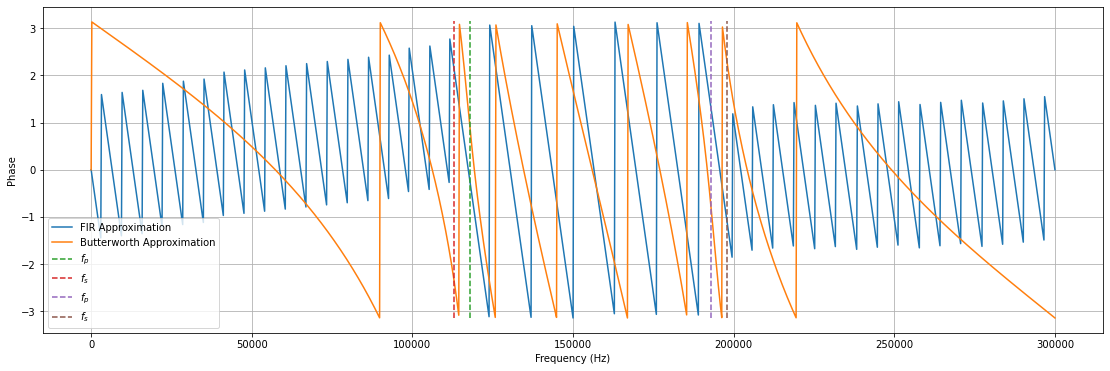

In [407]:

butter_response = np.loadtxt('butter.txt',dtype = complex)
butter_mag_resp = np.absolute(butter_response)
butter_phase = np.angle(butter_response)
freq = np.linspace(0,f_samp/2,1401)

plt.plot(freq,mag_resp,label="FIR Approximation")
plt.plot(freq,butter_mag_resp,label="Butter Approximation")

plt.plot([freq[0],freq[-1]], [1-delta1,1-delta1],'--', label='$1-\delta_1$')
plt.plot([freq[0],freq[-1]], [1+delta1,1+delta1],'--', label='$1+\delta_1$')
plt.plot([freq[0],freq[-1]], [delta2,delta2],'--', label='$\delta_2$')
plt.plot([fp1,fp1], [0,1],'--', label='$f_p$')
plt.plot([fs1,fs1], [0,1],'--', label='$f_s$')
plt.plot([fp2,fp2], [0,1],'--', label='$f_p$')
plt.plot([fs2,fs2], [0,1],'--', label='$f_s$')

plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain')
plt.grid(True)
plt.legend(loc='best')
plt.savefig('bp_mag_comp.pdf')
plt.show()

plt.plot(freq,phase,label="FIR Approximation")
plt.plot(freq,butter_phase,label="Butterworth Approximation")
plt.plot([fp1,fp1], [-np.pi,np.pi],'--', label='$f_p$')
plt.plot([fs1,fs1], [-np.pi,np.pi],'--', label='$f_s$')
plt.plot([fp2,fp2], [-np.pi,np.pi],'--', label='$f_p$')
plt.plot([fs2,fs2], [-np.pi,np.pi],'--', label='$f_s$')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase')
plt.grid(True)
plt.legend(loc='best')
plt.savefig('bp_phase_comp.pdf')
plt.show()

## Stopband

In [408]:
delta1 = 0.15
delta2 = 0.15
fp1,fp2,fs1,fs2,f_samp = 89000.0, 139000.0, 94000.0, 134000.0,425000

[wp1,wp2,ws1,ws2] = normalize(f_samp,[fp1,fp2,fs1,fs2])

wc1 = (wp1+ws1)/2
wc2 = (wp2+ws2)/2

print(wc1,wc2)
resp = ideal_sb(wc1,wc2)


1.3527328367221934 2.0180112810117965


In [409]:
# kaiser parameters

A = -20*np.log10(delta1)

if A < 21:
    alpha = 0
elif A <51:
    alpha = 0.5842*((A-21)**0.4) + 0.07886*(A-21)
else : alpha = 0.1102*(A-8.7)

N_lb = int(np.ceil(0.5*(A-8)/(2.285*(ws1-wp1)))) # lower bound on N
print(A,alpha,N_lb)

16.478174818886377 0 26


In [410]:
N = N_lb+20
n = np.linspace(-N,N,2*N+1)

In [411]:
response = resp(n)
print(response)

np.savetxt('stop.txt',response)

[ 2.89827342e-03 -8.60870790e-03 -4.10414426e-03  1.42666156e-02
  1.48925758e-03 -1.36327511e-02  1.38315529e-03  6.26407528e-03
 -4.34131255e-04  3.91852460e-03 -5.46576593e-03 -1.10809125e-02
  1.29812457e-02  1.15096496e-02 -1.61663373e-02 -6.34945767e-03
  1.06864551e-02  8.69659591e-04  2.51028044e-03 -4.85962677e-04
 -1.69267403e-02  6.23818782e-03  2.43111958e-02 -1.31476697e-02
 -2.02360995e-02  1.31383674e-02  7.58826063e-03 -1.01754130e-03
  4.86441987e-03 -2.04657868e-02 -8.46116067e-03  4.03758551e-02
  1.51000258e-03 -4.51794052e-02  7.75812016e-03  2.72593298e-02
 -4.82368549e-03  8.93892768e-03 -2.23818755e-02 -4.74861912e-02
  7.47069597e-02  6.87219652e-02 -1.38631804e-01 -6.00957977e-02
  1.91349523e-01  2.37660396e-02  7.88235294e-01  2.37660396e-02
  1.91349523e-01 -6.00957977e-02 -1.38631804e-01  6.87219652e-02
  7.47069597e-02 -4.74861912e-02 -2.23818755e-02  8.93892768e-03
 -4.82368549e-03  2.72593298e-02  7.75812016e-03 -4.51794052e-02
  1.51000258e-03  4.03758

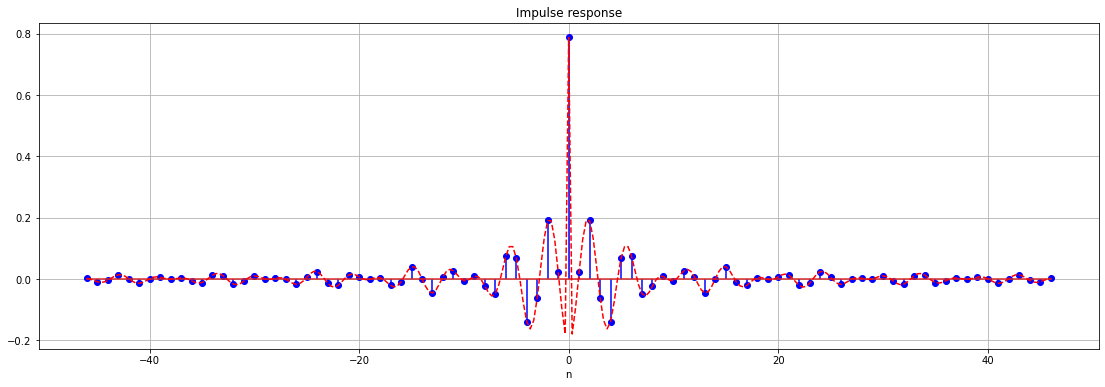

0.7882352941176471


In [412]:
plt.stem(n,response,'bo')
x = np.linspace(-N,N,6*N+1)
y = resp(x)
plt.plot(x,y,'r--')
plt.title('Impulse response')
plt.xlabel('n')
plt.grid(True)
plt.savefig('IR_sb.pdf')
plt.show()
print(response[N])

In [413]:
freq_resp_fn = myfourier(response)
ang_freq = np.linspace(0,np.pi,1401)
freq_resp = freq_resp_fn(ang_freq)

In [414]:
mag_resp = np.absolute(freq_resp)
phase = np.angle(freq_resp)


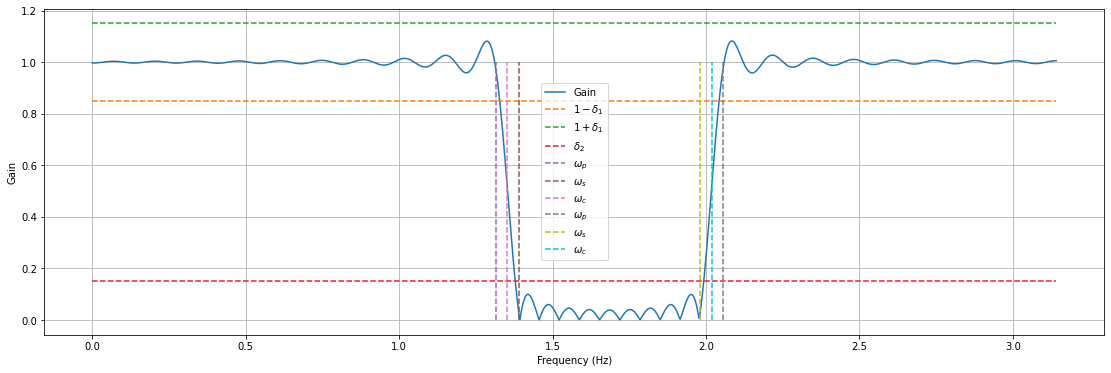

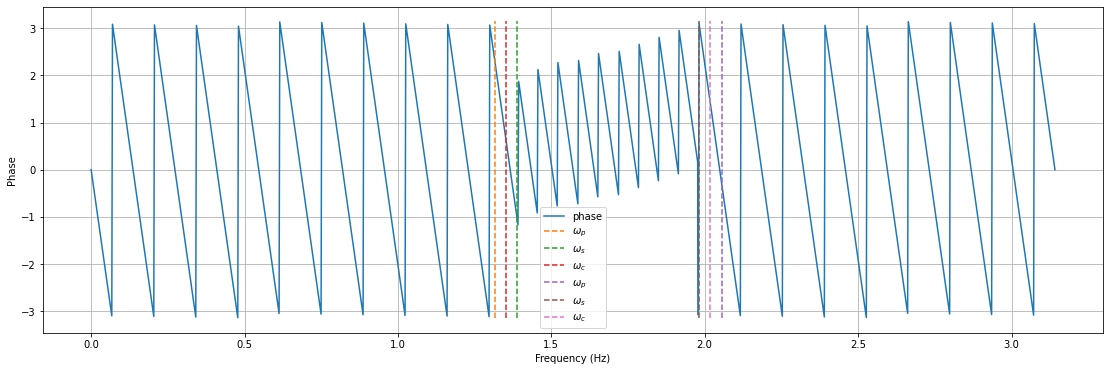

In [415]:
plt.plot(ang_freq,mag_resp,label="Gain")
plt.plot([ang_freq[0],ang_freq[-1]], [1-delta1,1-delta1],'--', label='$1-\delta_1$')
plt.plot([ang_freq[0],ang_freq[-1]], [1+delta1,1+delta1],'--', label='$1+\delta_1$')
plt.plot([ang_freq[0],ang_freq[-1]], [delta2,delta2],'--', label='$\delta_2$')
plt.plot([wp1,wp1], [0,1],'--', label='$\omega_p$')
plt.plot([ws1,ws1], [0,1],'--', label='$\omega_s$')
plt.plot([wc1,wc1], [0,1],'--', label='$\omega_c$')
plt.plot([wp2,wp2], [0,1],'--', label='$\omega_p$')
plt.plot([ws2,ws2], [0,1],'--', label='$\omega_s$')
plt.plot([wc2,wc2], [0,1],'--', label='$\omega_c$')

plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain')
plt.grid(True)
plt.legend(loc='best')
plt.savefig('sb_mag.pdf')
plt.show()

plt.plot(ang_freq,phase,label="phase")
plt.plot([wp1,wp1], [-np.pi,np.pi],'--', label='$\omega_p$')
plt.plot([ws1,ws1], [-np.pi,np.pi],'--', label='$\omega_s$')
plt.plot([wc1,wc1], [-np.pi,np.pi],'--', label='$\omega_c$')
plt.plot([wp2,wp2], [-np.pi,np.pi],'--', label='$\omega_p$')
plt.plot([ws2,ws2], [-np.pi,np.pi],'--', label='$\omega_s$')
plt.plot([wc2,wc2], [-np.pi,np.pi],'--', label='$\omega_c$')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase')
plt.grid(True)
plt.legend(loc='best')
plt.savefig('sb_phase.pdf')
plt.show()

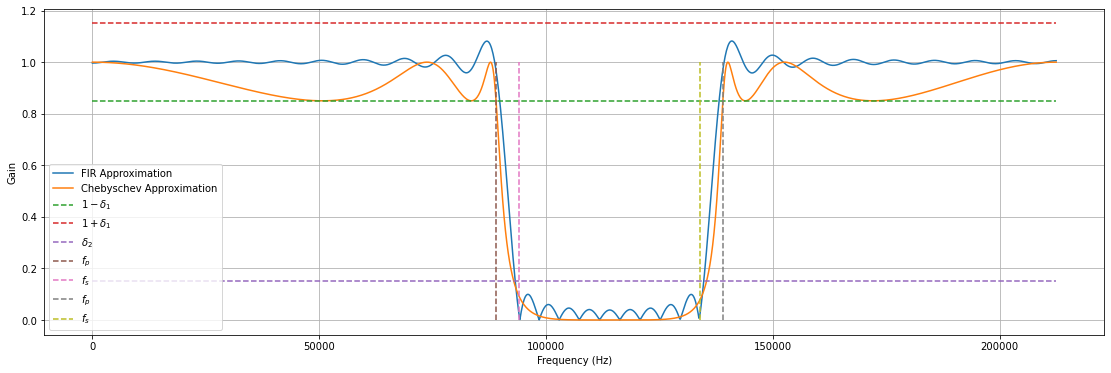

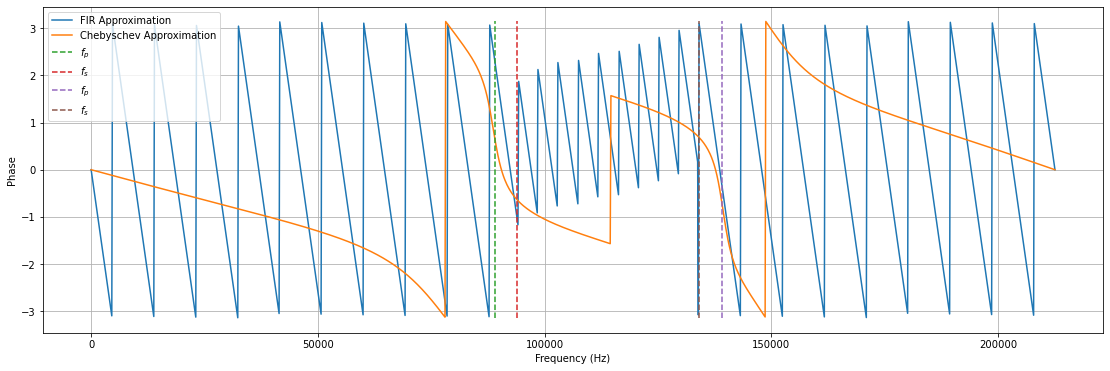

In [416]:

cheby_response = np.loadtxt('cheby.txt',dtype = complex)
cheby_mag_resp = np.absolute(cheby_response)
cheby_phase = np.angle(cheby_response)
freq = np.linspace(0,f_samp/2,1401)

plt.plot(freq,mag_resp,label="FIR Approximation")
plt.plot(freq,cheby_mag_resp,label="Chebyschev Approximation")

plt.plot([freq[0],freq[-1]], [1-delta1,1-delta1],'--', label='$1-\delta_1$')
plt.plot([freq[0],freq[-1]], [1+delta1,1+delta1],'--', label='$1+\delta_1$')
plt.plot([freq[0],freq[-1]], [delta2,delta2],'--', label='$\delta_2$')
plt.plot([fp1,fp1], [0,1],'--', label='$f_p$')
plt.plot([fs1,fs1], [0,1],'--', label='$f_s$')
plt.plot([fp2,fp2], [0,1],'--', label='$f_p$')
plt.plot([fs2,fs2], [0,1],'--', label='$f_s$')

plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain')
plt.grid(True)
plt.legend(loc='best')
plt.savefig('sb_mag_comp.pdf')
plt.show()

plt.plot(freq,phase,label="FIR Approximation")
plt.plot(freq,cheby_phase,label="Chebyschev Approximation")
plt.plot([fp1,fp1], [-np.pi,np.pi],'--', label='$f_p$')
plt.plot([fs1,fs1], [-np.pi,np.pi],'--', label='$f_s$')
plt.plot([fp2,fp2], [-np.pi,np.pi],'--', label='$f_p$')
plt.plot([fs2,fs2], [-np.pi,np.pi],'--', label='$f_s$')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase')
plt.grid(True)
plt.legend(loc='best')
plt.savefig('sb_phase_comp.pdf')
plt.show()